# Лабораторная работа 2. Классификация текстов на основе словарей

#### Работу выполнил: Самойло Александр, студент группы ФИб-4

**Задание 1.** Загрузите в датафрейм новостной датасет `lenta_ru_news_filtered.csv`, собранный на базе корпуса `lenta.ru v1.0`. В датасете каждая новость описывается следующими полями:
* **url** - адрес новости на сайте `lenta.ru`,
* **topic** - тема новости,
* **title** - заголовок новости,
* **text** - текст новости.

Выполните предобработку новостных текстов в виде:
- приведение слов к нормальной форме,
- приведение к нижнему регистру,
- удаление знаков пунктуации.

**(!) Далее в лабораторной работе задания выполняются с полученными обработанными текстами**.

Разделите датасет на две части в соотношении 80% к 20%. Можно использовать метод `train_test_split` библиотеки `sklearn`. Используйте параметры `stratify` для того, чтобы при разбиении сохранилась исходная пропорция классов, и `shuffle` для перемешивания данных.\
Подключение метода:
```python
from sklearn.model_selection import train_test_split
```

Выведите диаграммы, отражающие количество текстов по каждой теме в полученных частях.

Далее по `первой` части датасета будут строиться словари слов, которые характеризуют новостные тексты на конкретную тему. А на `второй` части будут замеряться метрики качества классификации на основе полученных словарей.

Всего новостных текстов в df:


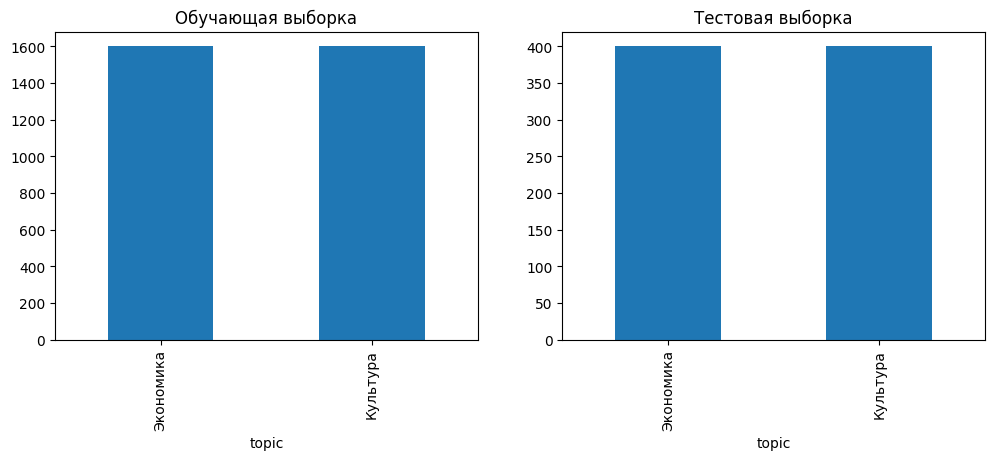

In [4]:
import pandas as pd
import os
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

file_path = "data\\news_lemmatized.csv"
if os.path.exists(file_path):
    df = pd.read_csv(file_path)
else:
    print(f"Файл {file_path} не найден.")

print('Всего новостных текстов в df:')


# X — данные (тексты), y — метки тем
X_train, X_test, y_train, y_test = train_test_split(
    df['processed_text'], 
    df['topic'], 
    test_size=0.2, 
    stratify=df['topic'],   # сохраняем пропорции тем
    shuffle=True,           # перемешиваем
    random_state=42         # для воспроизводимости
)
fig, axes = plt.subplots(1, 2, figsize=(12,4))
y_train.value_counts().plot(kind='bar', ax=axes[0], title='Обучающая выборка')
y_test.value_counts().plot(kind='bar', ax=axes[1], title='Тестовая выборка')
plt.show()

    

**Задание 2.** Подсчитайте частоты (количество) встречаемости слов предобработанных новостных текстов `первой` части датафрейма.\
Какие слова употребляются наиболее часто вцелом в этих новостных текстах, а какие слова употребляются в этих же новостных текстах относительно тем (выведите топ-50 слов для каждого случая)?

Нахождение частот слов в новостных текстах датафрейма можно выполнять посредством инструмента `FreqDist` библиотеки `NLTK`.\
Например:
```python
import pandas as pd
import nltk

nltk.download('punkt_tab')

df['text'].apply(lambda x: nltk.FreqDist(nltk.word_tokenize(x)))
```

Сделайте вывод о пересечении полученных списков топ-50. Какие слова повторяются в списках, охарактеризуйте данные слова.

In [6]:
from nltk import *

df_train = pd.DataFrame({'processed_text': X_train, 'topic': y_train})

all_freq = FreqDist()
topic_freq = defaultdict(FreqDist)

for idx, row in df_train.iterrows():
    text = row['processed_text']
    if pd.isna(text):
        continue
    words = text.split()
    fdist = FreqDist(words)
    all_freq += fdist
    topic_freq[row['topic']] += fdist

print("Топ-50 слов во всём корпусе:\n")
for word, count in all_freq.most_common(50):
    print(f"{word}: {count}")

for topic, fdist in topic_freq.items():
    print(f"\n--- Тема: {topic} ---")
    for word, count in fdist.most_common(50):
        print(f"{word}: {count}")

common_set = set(word for word, _ in all_freq.most_common(50))
print("\n=== Анализ пересечений с общим топ-50 ===")
for topic, fdist in topic_freq.items():
    topic_set = set(word for word, _ in fdist.most_common(50))
    inter = common_set & topic_set
    print(f"{topic}: пересечение {len(inter)} слов: {', '.join(inter)}")

Топ-50 слов во всём корпусе:

в: 22680
и: 12981
на: 11144
что: 6903
с: 6469
год: 5783
быть: 4626
это: 4507
не: 4368
В: 4198
он: 4117
по: 3979
который: 3578
из: 3127
за: 2957
Россия: 2652
о: 2580
процент: 2303
для: 2018
компания: 2006
к: 1964
она: 1914
тот: 1884
О: 1871
они: 1811
рубль: 1767
а: 1733
По: 1724
свой: 1644
как: 1641
также: 1600
от: 1567
до: 1442
стать: 1379
российский: 1363
доллар: 1256
слово: 1248
заявить: 1214
мочь: 1214
миллиард: 1151
Он: 1116
один: 1098
страна: 1058
сообщать: 1046
новый: 1042
у: 1028
весь: 1014
этот: 1009
я: 992
отметить: 989

--- Тема: Экономика ---
в: 12313
и: 7695
на: 7565
с: 3846
что: 3711
год: 3490
по: 2856
быть: 2654
это: 2541
не: 2394
В: 2304
процент: 2265
который: 2123
Россия: 2009
компания: 1891
за: 1849
из: 1725
он: 1699
рубль: 1656
для: 1595
о: 1496
к: 1299
до: 1173
они: 1168
По: 1165
тот: 1142
миллиард: 1125
а: 1110
доллар: 1107
российский: 1102
от: 1083
цена: 929
мочь: 905
страна: 884
рынок: 845
также: 834
США: 818
свой: 814
О: 808
новый: 7

**Задание 3.** Составьте словари для каждой из тем на основе текстов `первой` части датасетов. Словари будут представлять отсортированные по частоте списки слов, которые встречаются **только в одной из каждых тем**. То есть из списков слов, полученных в предыдущем задании нужно удалить слова, встречающиеся в более чем в одной теме. *Размер словарей не ограничивайте, так как далее будем смотреть зависимость качества классификации от размера словарей.*\
Постройте диаграмму для топ-50 слов каждой темы (ось X - слова, ось Y - частоты встречаемости слов в новостных текстах).\
Сделайте выводы о составе получившихся словарей. Какие слова удалились? В какой степени словари описавают слою тему?

In [ ]:
# ваш код

**Задание 4.** Напишите функцию классификации новостного текста на основе `top-k слов` (`k` - задаваемый параметр) из тематических словарей (построенных в предыдущем задании на основе `обучающей` части датасета).\
Общий алгоритм классификации:
- В новостном тексте `x` считаем сколько встречается слов, из каждого тематического словаря.
- Выбираем тему для текста `x` с максимальным количеством слов из её тематического словаря.
- Если слов не нашлось или максимальное значение получилось у нескольких тем, то эти тексты считаем "неопределённой" темы.

Оцените качество классификации новостных текстов по `второй` части датасета, вычислив меры `recall`, `precision` и `accuracy`. Также вычислите сколько текстов осталось с "неопределённой" темой?

In [ ]:
# ваш код

**Задание 5.** Используя тексты `второй` части датасета, постройте три отдельных графика, на каждом из которых показана зависимость качества классификации от размера словаря (в словах). На всех трёх графиках по оси *X* будет указываться размер используемых тематических словарей (вычислите для топ-10, топ-50, топ-100). А по оси *Y* на **первом** графике должны быть показаны значения `recall`, на **втором** - `precision` и на *третьем* - количество текстов с "неопределённой" темой.\
Сделайте выводы по графикам относительно такого метода классификации.

In [ ]:
# ваш код